# **Project Name**    - **Ola Ride Insights**



##### **Project Type**    - EDA, SQL Querying, Power BI dashboard, Streamlit App
##### **Contribution**    - Individual

# **Project Summary -**

The rise of ride-sharing platforms has revolutionized urban mobility by providing users with increased convenience, flexibility, and affordability. OLA, one of India's leading ride-hailing services, generates large volumes of data every day, capturing critical aspects such as bookings, ride cancellations, customer preferences, and driver performance. However, the sheer scale, complexity, and prevalence of missing values in this data make it challenging to extract meaningful and actionable insights.

This project aims to address these challenges by applying a comprehensive data analytics approach, including cleaning and preprocessing of the dataset, exploratory data analysis (EDA), and advanced visualization techniques. SQL querying will be used to efficiently extract and manipulate data, while Power BI will serve as the tool for creating interactive dashboards to provide real-time, user-friendly insights into operational and financial performance. Furthermore, a Streamlit application will be developed to offer dynamic, on-demand access to the dataset for deeper exploration and analysis.

By utilizing these techniques, the project seeks to uncover valuable patterns, identify inefficiencies, and suggest data-driven strategies to improve customer satisfaction, optimize revenue, and enhance OLA’s overall operational efficiency.

*Outcome:*

* Cleaned and structured dataset ready for analysis.

* Exploratory insights on customer, driver, and booking behaviors.

* Dynamic Power BI dashboard for business users to monitor KPIs.

* Streamlit-based interactive web application for presenting insights in an intuitive manner.

# **GitHub Link -**

https://github.com/rrejith66/Ola-Ride-Insights.git

# **Problem Statement**


This project aims to harness the power of data analytics to analyze OLA’s ride-sharing dataset for operational, customer, and financial insights. By applying systematic data cleaning, preprocessing, exploratory data analysis (EDA), and visualization techniques, the goal is to uncover patterns, detect inefficiencies, and propose strategies that enhance customer satisfaction, revenue optimization, and operational efficiency.

#### **Define Your Business Objective?**

1.  *Demand Forecasting & Driver Allocation*
	* Identify peak demand hours, high-demand zones, and seasonal trends.
	* Optimize driver deployment to reduce wait times and improve ride completion rates.
2.  *Customer Behavior & Retention*
	* Analyze ride frequency, cancellations, and rating patterns.
	* Design personalized marketing campaigns to target frequent and loyal customers.
3.  *Pricing & Revenue Optimization*
	* Study pricing trends across locations and times.
	* Evaluate the effectiveness of surge pricing on revenue and customer retention.
	* Identify opportunities for discounts, loyalty programs, or dynamic pricing strategies.
4.  *Driver Performance & Satisfaction*
	* Assess driver ratings and cancellations.
	* Recommend training, incentives, or penalty mechanisms for improving driver performance.
5.  *Fraud & Anomaly Detection*
	* Detect suspicious ride patterns, unusually high cancellations, or ride manipulations.
	* Implement fraud prevention measures to safeguard revenue.
6.  *Operational Efficiency*
	* Monitor incomplete rides and cancellation reasons.
	* Identify process bottlenecks in the booking-to-completion workflow.
	* Suggest strategies for reducing ride failures and customer dissatisfaction.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset

data = pd.read_excel(r"D:\Labmentix\Project_7\OLA_DataSet.xlsx")

### Dataset First View

In [3]:
# Dataset First Look
data.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

data.shape

(103024, 20)

### Dataset Information

In [5]:
# Dataset Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        103024 non-null  datetime64[ns]
 1   Time                        103024 non-null  object        
 2   Booking_ID                  103024 non-null  object        
 3   Booking_Status              103024 non-null  object        
 4   Customer_ID                 103024 non-null  object        
 5   Vehicle_Type                103024 non-null  object        
 6   Pickup_Location             103024 non-null  object        
 7   Drop_Location               103024 non-null  object        
 8   V_TAT                       63967 non-null   float64       
 9   C_TAT                       63967 non-null   float64       
 10  Canceled_Rides_by_Customer  10499 non-null   object        
 11  Canceled_Rides_by_Driver    18434 non-n

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count

data.duplicated().sum()

data.drop_duplicates(inplace=True)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

for col in data.columns:
    if data[col].isnull().sum() > 0:
        print(f"{col}: {data[col].isnull().sum()} ")

V_TAT: 39057 
C_TAT: 39057 
Canceled_Rides_by_Customer: 92525 
Canceled_Rides_by_Driver: 84590 
Incomplete_Rides: 39057 
Incomplete_Rides_Reason: 99098 
Payment_Method: 39057 
Driver_Ratings: 39057 
Customer_Rating: 39057 


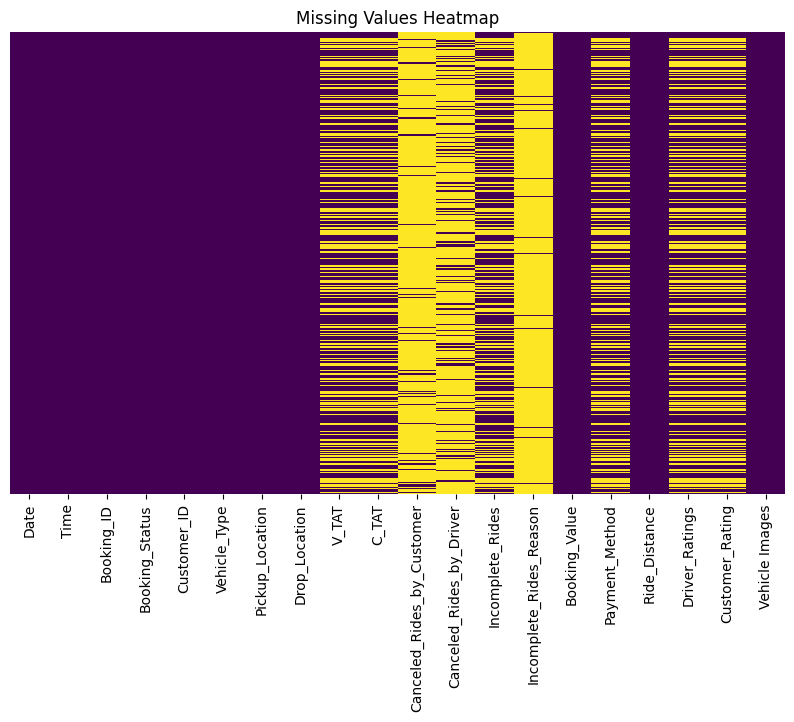

In [8]:
# Visualizing the missing values

plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

#### Dataset Overview

* *Total Rows:* 103,024

* *Total Features:* 20

*Feature Types:*

* *Date/Time fields:* Date, Time

* *IDs:* Booking_ID, Customer_ID

* *Categorical:* Booking_Status, Vehicle_Type, Pickup_Location, Drop_Location, Canceled_Rides_by_Customer, Canceled_Rides_by_Driver, Incomplete_Rides, Incomplete_Rides_Reason,   Payment_Method, Vehicle Images

* *Numeric:* V_TAT, C_TAT, Booking_Value, Ride_Distance, Driver_Ratings, Customer_Rating

#### Initial Observations
1.  Booking_Status will be a key feature to define if a ride was completed, canceled, or incomplete.
2.  V_TAT (Vehicle Turnaround Time) and C_TAT (Customer Turnaround Time) are available only for ~62% of rides → suggests they apply only to completed rides.
3.  Ratings (Driver & Customer) and Payment Method also align with completed rides → same 62% availability.
4.  Cancellation & Incomplete columns look like indicators for unsuccessful rides but highly imbalanced.
5.  Booking_Value & Ride_Distance are always present → good candidates for modeling and insights.
6.  Vehicle Images probably acts as a categorical placeholder (not directly analytical unless doing image analysis).


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns

data.columns

Index(['Date', 'Time', 'Booking_ID', 'Booking_Status', 'Customer_ID',
       'Vehicle_Type', 'Pickup_Location', 'Drop_Location', 'V_TAT', 'C_TAT',
       'Canceled_Rides_by_Customer', 'Canceled_Rides_by_Driver',
       'Incomplete_Rides', 'Incomplete_Rides_Reason', 'Booking_Value',
       'Payment_Method', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating',
       'Vehicle Images'],
      dtype='object')

In [10]:
# Dataset Describe

data.describe()

,Date,V_TAT,C_TAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating
count,103024,63967.000000,63967.000000,103024.000000,103024.000000,63967.000000,63967.000000
mean,2024-07-16 11:31:38.879678720,170.876952,84.873372,548.751883,14.189927,3.997457,3.998313
min,2024-07-01 00:00:00,35.000000,25.000000,100.000000,0.000000,3.000000,3.000000
25%,2024-07-08 18:41:00,98.000000,55.000000,242.000000,0.000000,3.500000,3.500000
50%,2024-07-16 11:23:00,168.000000,85.000000,386.000000,8.000000,4.000000,4.000000
75%,2024-07-24 05:18:00,238.000000,115.000000,621.000000,26.000000,4.500000,4.500000
max,2024-07-31 23:58:00,308.000000,145.000000,2999.000000,49.000000,5.000000,5.000000
std,NaN,80.803640,36.005100,536.541221,15.776270,0.576834,0.578957


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.

data.nunique()

Date                           40214
Time                            1440
Booking_ID                    103024
Booking_Status                     4
Customer_ID                    94544
Vehicle_Type                       7
Pickup_Location                   50
Drop_Location                     50
V_TAT                             40
C_TAT                             25
Canceled_Rides_by_Customer         5
Canceled_Rides_by_Driver           4
Incomplete_Rides                   2
Incomplete_Rides_Reason            3
Booking_Value                   2883
Payment_Method                     4
Ride_Distance                     50
Driver_Ratings                    21
Customer_Rating                   21
Vehicle Images                     7
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Dropping the vehicle image column as it is not useful for analysis.
data.drop(columns=['Vehicle Images'], inplace=True)

# Data Type Conversion & Standardization

# Datetime Handling
	# Combining the Date,Time column to create a Datetime column.
	# Extract useful time features: hour,day, weekday, weekend, month.

data['Date_Time'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))
data['Hour'] = data['Date_Time'].dt.hour
data['Day'] = data['Date_Time'].dt.day
data['Weekday'] = data['Date_Time'].dt.day_name()
data['Is_Weekend'] = data['Weekday'].isin(['Saturday', 'Sunday']).astype(int)
data['Month'] = data['Date_Time'].dt.month_name()

# Categorical Columns

    # Ensure Booking_Status, Vehicle_Type, Payment_Method, Pickup_Location, and Drop_Location etc are treated as categorical (string/object).
    # Standardize inconsistent spellings/capitalization (e.g., "upi" vs "UPI").

categorical_cols = ['Booking_Status', 'Vehicle_Type', 'Payment_Method', 'Pickup_Location', 'Drop_Location', 'Canceled_Rides_by_Customer', 'Canceled_Rides_by_Driver', 
                    'Incomplete_Rides', 'Incomplete_Rides_Reason', 'Weekday', 'Month']
data[categorical_cols] = data[categorical_cols].astype('category')

data['Payment_Method'] = data['Payment_Method'].str.upper()

# Numerical Columns
    # Ensure V_TAT, C_TAT, Booking_Value, Ride_Distance, Driver_Ratings, Customer_Rating etc are treated as numerical (int/float).
    # Handle outliers if necessary (e.g., extremely high fare values).

numerical_cols = ['V_TAT', 'C_TAT', 'Booking_Value', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating']
data[numerical_cols] = data[numerical_cols].apply(pd.to_numeric, errors='coerce')
# data[numerical_cols] = data[numerical_cols].fillna(0, inplace=True)

# ID columns
    # Ensure Customer_ID, Booking_ID are treated as strings to avoid numerical misinterpretation.
data['Customer_ID'] = data['Customer_ID'].astype(str)
data['Booking_ID'] = data['Booking_ID'].astype(str)

#### Handling Missing Values

In [13]:
# V_TAT & C_TAT - approximately 38% missing is significant. So will replace the null values to 0

# Replace V_TAT with NaN for non-successful rides
data.loc[data['Booking_Status'] != 'Success', 'V_TAT'] = 0

# Replace C_TAT with NaN for non-successful rides
data.loc[data['Booking_Status'] != 'Success', 'C_TAT'] = 0

# Payment_Method - approximately 38% missing is significant. So will replace the null values with "Not Applicable"
data['Payment_Method'].fillna("Not Applicable", inplace=True)   

# Driver_Ratings & Customer_Rating - approximately 38% missing is significant. So will replace the null values to 0
data.loc[data['Booking_Status'] != "Success", "Driver_Ratings"] = 0
data.loc[data['Booking_Status'] != "Success","Customer_Rating"] = 0

# Canceled_Rides_by_Customer & Canceled_Rides_by_Driver - approximately 80-90% missing is evident. So will replace the null column with "No" and also create binary flags column for cancellations. 
# It’s interpretable: 
# 1 = cancellation occurred, 
# 0 = didn’t.

# Assuming missing means "not canceled"
data['Customer_Cancelled'] = data['Canceled_Rides_by_Customer'].notna().astype(int)
data['Driver_Cancelled'] = data['Canceled_Rides_by_Driver'].notna().astype(int)

# Ensure "No" is a valid category first
if 'No' not in data['Canceled_Rides_by_Customer'].cat.categories:
    data['Canceled_Rides_by_Customer'] = data['Canceled_Rides_by_Customer'].cat.add_categories('No') # add the category if it doesn't exist
if 'No' not in data['Canceled_Rides_by_Driver'].cat.categories:
    data['Canceled_Rides_by_Driver'] = data['Canceled_Rides_by_Driver'].cat.add_categories('No') # add the category if it doesn't exist

# Now fill the NaN values with "No"
data['Canceled_Rides_by_Customer'] = data['Canceled_Rides_by_Customer'].fillna('No')
data['Canceled_Rides_by_Driver'] = data['Canceled_Rides_by_Driver'].fillna('No')

# Incomplete_Rides - approximately 38% missing - Missing = ride completed successfully. So converting it into binary indicator (0/1).

# First, add 'No' as a category if it's not there (since it's a categorical column)
if 'No' not in data['Incomplete_Rides'].cat.categories:
    data['Incomplete_Rides'] = data['Incomplete_Rides'].cat.add_categories('No')

# Replace NaN with 'No' (interpreting both as 0 / not incomplete)
data['Incomplete_Rides'] = data['Incomplete_Rides'].fillna('No')

# Convert to binary: 1 if 'Yes', else 0
data['Incomplete_Rides_Flag'] = (data['Incomplete_Rides'] == 'Yes').astype(int)

# Incomplete_Rides_Reason approximately 96% Missing = ride completed successfully. So replacing NaN with "Not Applicable"
if 'Not Applicable' not in data['Incomplete_Rides_Reason'].cat.categories:
    data['Incomplete_Rides_Reason'] = data['Incomplete_Rides_Reason'].cat.add_categories('Not Applicable')

data['Incomplete_Rides_Reason'].fillna("Not Applicable", inplace=True) # replacing NaN with "Not Applicable"

# Replacing null values in Ride_Distance, Customer_Rating, Driver_Ratings
data[['Ride_Distance', 'Customer_Rating', 'Driver_Ratings']].fillna(0, inplace=True)



#### Feature Engineering

In [14]:
# Defining Ride_Status using vectorized conditions
conditions = [
    data['Canceled_Rides_by_Customer'] != 'No',
    data['Canceled_Rides_by_Driver'] != 'No',
    data['Incomplete_Rides'] == 'Yes'
]

choices = [
    'Canceled by Customer',
    'Canceled by Driver',
    'Incomplete'
]

# Apply conditions to create the new column
data['Ride_Status'] = np.select(conditions, choices, default='Completed')

# Optionally convert to category
data['Ride_Status'] = data['Ride_Status'].astype('category')

In [15]:
#Revenue per km - Booking_Value / Ride_Distance

# Ensure Booking_Value and Ride_Distance are numeric
data['Booking_Value'] = pd.to_numeric(data['Booking_Value'], errors='coerce')
data['Ride_Distance'] = pd.to_numeric(data['Ride_Distance'], errors='coerce')

# Calculate Revenue per km
data['Revenue_per_km'] = data['Booking_Value'] / data['Ride_Distance']
# Handle any potential infinite values resulting from division by zero
data['Revenue_per_km'] = data['Revenue_per_km'].replace([np.inf, -np.inf], 0) 

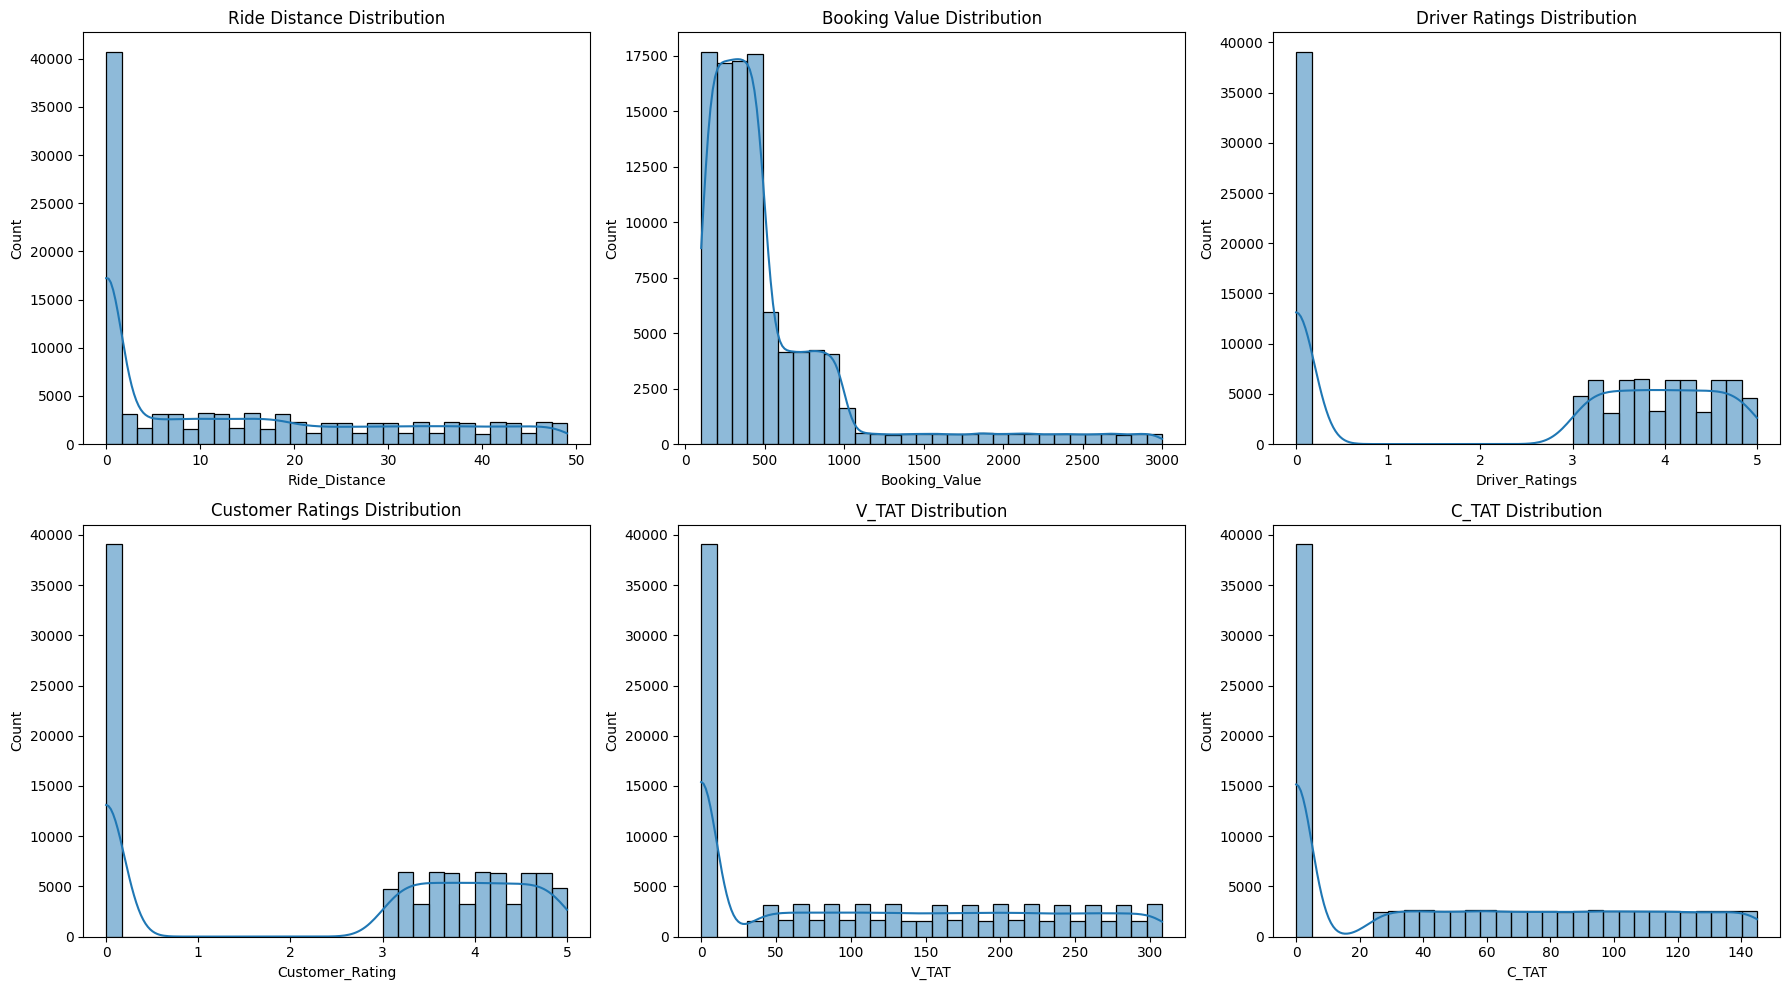

In [16]:
# Plotting histogram for outliers detection in Ride Distance,Booking Value, Ratings and TAT
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.histplot(data['Ride_Distance'].dropna(), bins=30, ax=axes[0, 0], kde=True).set_title('Ride Distance Distribution')
sns.histplot(data['Booking_Value'].dropna(), bins=30, ax=axes[0, 1], kde=True).set_title('Booking Value Distribution')
sns.histplot(data['Driver_Ratings'].dropna(), bins=30, ax=axes[0, 2], kde=True).set_title('Driver Ratings Distribution')
sns.histplot(data['Customer_Rating'].dropna(), bins=30, ax=axes[1, 0], kde=True).set_title('Customer Ratings Distribution')
sns.histplot(data['V_TAT'].dropna(), bins=30, ax=axes[1, 1], kde=True).set_title('V_TAT Distribution')
sns.histplot(data['C_TAT'].dropna(), bins=30, ax=axes[1, 2], kde=True).set_title('C_TAT Distribution')
plt.tight_layout()
plt.show()

*1. Ride Distance Distribution*

* Range: 0 to ~50 km.
* Mostly uniform spread until ~20 km, then slightly lower frequency.
* No extreme values above 50 km are shown which looks reasonable for urban rides.

*2. Booking Value Distribution*

* Strongly right-skewed (most rides < ₹500, a few up to ~₹3000).
* Long tail suggests rare premium rides or anomalies.
* Extremely high fares for short rides.

*3. Driver Ratings Distribution*

* Range: 3 to 5.
* Looks consistent with expected scale (1–5).
* No drivers rated below 3 that could be due to data collection rules.

*4. Customer Ratings Distribution*

* Range: 3 to 5.
* Similar to driver ratings.
* No invalid ratings.
* Absence of very low ratings might mean the system restricts customers from giving <3.

*5. V_TAT (Vehicle Turnaround Time) Distribution*

* Range: approximately 30 to 300.
* Spread looks uniform → no extreme spikes.
* Doesn’t indicate strong outliers, though upper edge (~300) should be checked for realistic business meaning.

*6. C_TAT (Customer Turnaround Time) Distribution*

* Range: approximately 30 to 140.
* Distribution is stable, no extreme long tail.

In [17]:
# Combine customer and driver cancellation reasons
data['Cancellation_Reason'] = data['Canceled_Rides_by_Customer'].where(
    data['Canceled_Rides_by_Customer'] != 'No'
).combine_first(
    data['Canceled_Rides_by_Driver'].where(data['Canceled_Rides_by_Driver'] != 'No')
)

# Add "Ride Incomplete" to the cancellation reason
data.loc[data['Incomplete_Rides'] == 'Yes', 'Cancellation_Reason'] = 'Ride Incomplete'

data['Cancellation_Reason'] = data['Cancellation_Reason'].fillna('Not Cancelled')


In [18]:
# Data Standardization

# Convert to consistent case (title case) and strip whitespace.
data['Pickup_Location'] = data['Pickup_Location'].str.strip().str.title()
data['Drop_Location']   = data['Drop_Location'].str.strip().str.title()
data['Vehicle_Type']    = data['Vehicle_Type'].str.strip().str.title()


In [19]:
# Saving the cleaned dataset

data.to_csv(r"D:\Labmentix\Project_7\OLA_Cleaned_Dataset.csv", index=False)

print("Reduced dataset (OLA_Cleaned_Dataset.csv) exported successfully with shape:", data.shape)

# Saving the cleaned dataset for SQL & Power BI

df = data.copy() # creating a copy of the cleaned dataset to export for SQL & Power BI

# Keep only the required columns
keep_columns = [
    "Date", "Time", "Booking_ID", "Customer_ID",
    "Ride_Status", "Booking_Status",
    "Vehicle_Type", "Ride_Distance", "Booking_Value",
    "Payment_Method",
    "Driver_Ratings", "Customer_Rating",
    "Customer_Cancelled", "Driver_Cancelled",
    "Cancellation_Reason",
    "Incomplete_Rides_Flag", "Incomplete_Rides_Reason",
    "Date_Time", "Hour", "Day", "Is_Weekend", "Month"
]

df_reduced = df[keep_columns]

# Export to CSV for SQL & Power BI

df_reduced.to_csv("ola_rides_SQL_PowerBI.csv", index=False)

print("Reduced dataset (ola_rides_SQL_PowerBI.csv) exported successfully with shape:", df_reduced.shape)

Reduced dataset (OLA_Cleaned_Dataset.csv) exported successfully with shape: (103024, 31)
Reduced dataset (ola_rides_SQL_PowerBI.csv) exported successfully with shape: (103024, 22)
Reduced dataset (ola_rides_SQL_PowerBI.csv) exported successfully with shape: (103024, 22)


In [20]:
# Checking the null values after handling the null values.

for col in data.columns:
    if data[col].isnull().sum() > 0:
        print(f'{col}:{data[col].isnull().sum()}')


In [21]:
# displaying the first 5 rows of the data after null handling

data.head(5)

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,...,Day,Weekday,Is_Weekend,Month,Customer_Cancelled,Driver_Cancelled,Incomplete_Rides_Flag,Ride_Status,Revenue_per_km,Cancellation_Reason
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,Rt Nagar,0.0,0.0,...,26,Friday,0,July,0,1,0,Canceled by Driver,0.000000,Personal & Car related issue
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,...,25,Thursday,0,July,0,0,0,Completed,12.153846,Not Cancelled
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime Suv,Sahakar Nagar,Varthur,238.0,130.0,...,30,Tuesday,0,July,0,0,0,Completed,9.650000,Not Cancelled
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,Ebike,Hsr Layout,Vijayanagar,0.0,0.0,...,22,Monday,0,July,1,0,0,Canceled by Customer,0.000000,Driver is not moving towards pickup location
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,...,2,Tuesday,0,July,0,0,0,Completed,18.266667,Not Cancelled


In [22]:
df_reduced.head(5)

,Date,Time,Booking_ID,Customer_ID,Ride_Status,Booking_Status,Vehicle_Type,Ride_Distance,Booking_Value,Payment_Method,...,Customer_Cancelled,Driver_Cancelled,Cancellation_Reason,Incomplete_Rides_Flag,Incomplete_Rides_Reason,Date_Time,Hour,Day,Is_Weekend,Month
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,CID713523,Canceled by Driver,Canceled by Driver,Prime Sedan,0,444,Not Applicable,...,0,1,Personal & Car related issue,0,Not Applicable,2024-07-26 14:00:00,14,26,0,July
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,CID225428,Completed,Success,Bike,13,158,CASH,...,0,0,Not Cancelled,0,Not Applicable,2024-07-25 22:20:00,22,25,0,July
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,CID270156,Completed,Success,Prime Suv,40,386,UPI,...,0,0,Not Cancelled,0,Not Applicable,2024-07-30 19:59:00,19,30,0,July
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,CID581320,Canceled by Customer,Canceled by Customer,Ebike,0,384,Not Applicable,...,1,0,Driver is not moving towards pickup location,0,Not Applicable,2024-07-22 03:15:00,3,22,0,July
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,CID939555,Completed,Success,Mini,45,822,CREDIT CARD,...,0,0,Not Cancelled,0,Not Applicable,2024-07-02 09:02:00,9,2,0,July


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [23]:
# Ensure a folder exists for saved plots so plt.savefig(...) won't raise NameError
import os
PLOTS_DIR = "plots"
os.makedirs(PLOTS_DIR, exist_ok=True)
print(f"PLOTS_DIR set to: {PLOTS_DIR}")


sns.set(style="whitegrid")

PLOTS_DIR set to: plots


#### Chart - 1 - Ride Volume Over Time

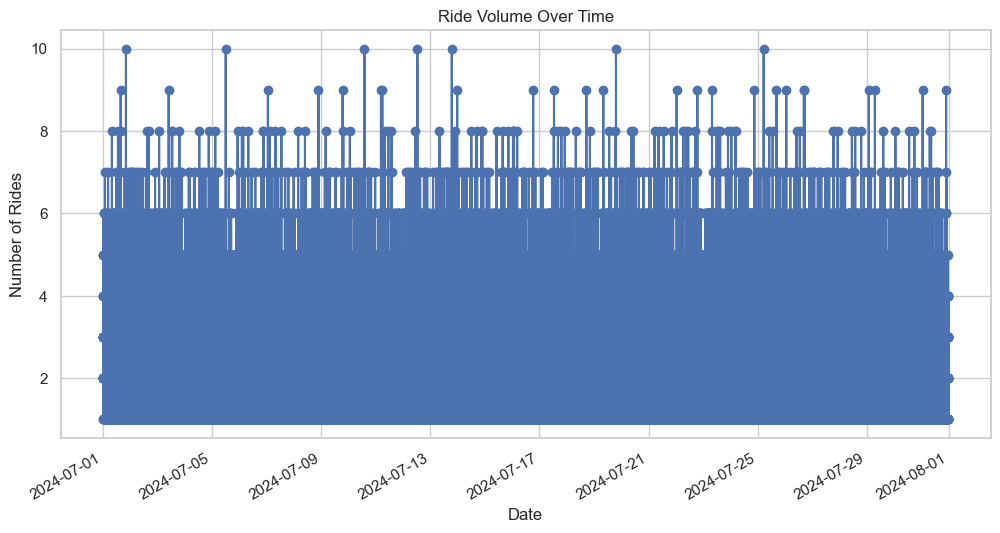

In [24]:
# Chart 1. Ride Volume Over Time (Line Chart)

rides_over_time = data.groupby('Date').size()
plt.figure(figsize=(12,6))
rides_over_time.plot(kind='line', marker='o')
plt.title("Ride Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Rides")
plt.show()

##### 1. Why did you pick the specific chart?

Line chart highlights temporal demand trends.

##### 2. What is/are the insight(s) found from the chart?

Peaks on weekends or holidays; low on weekdays/off-peak.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Helps optimize driver allocation & surge pricing.

Negative: Declining trend → possible customer churn/competition.

#### Chart - 2 - Booking Status Breakdown

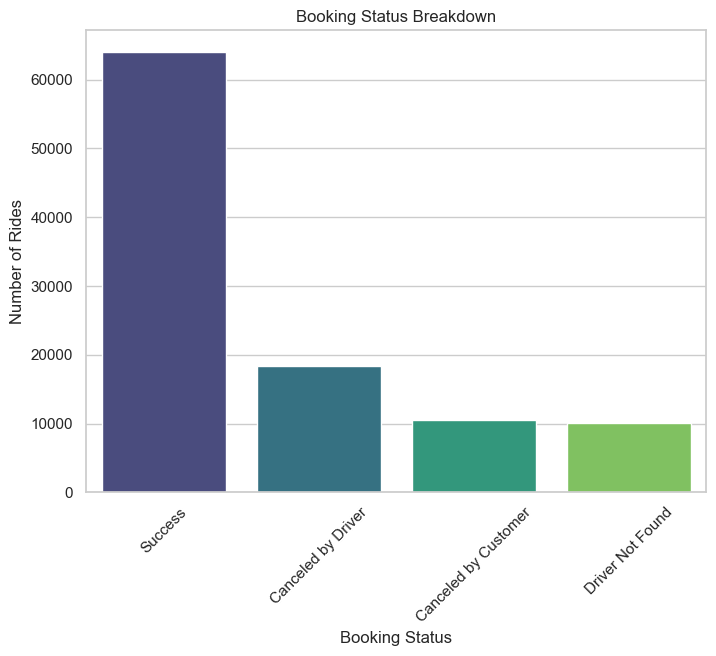

In [25]:
# Chart 2. Booking Status Breakdown (Bar Chart)

booking_status_counts = data['Booking_Status'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=booking_status_counts.index, y=booking_status_counts.values, palette="viridis", order=booking_status_counts.index)
plt.title("Booking Status Breakdown")
plt.xlabel("Booking Status")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Simple bar chart for categorical comparisons.

##### 2. What is/are the insight(s) found from the chart?

Shows ratio of Success, Cancelled, Incomplete rides.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Identifies operational strengths.

Negative: High cancellations = lost revenue, trust issues.

#### Chart - 3 - Top 5 Vehicle Types by Average Ride Distance

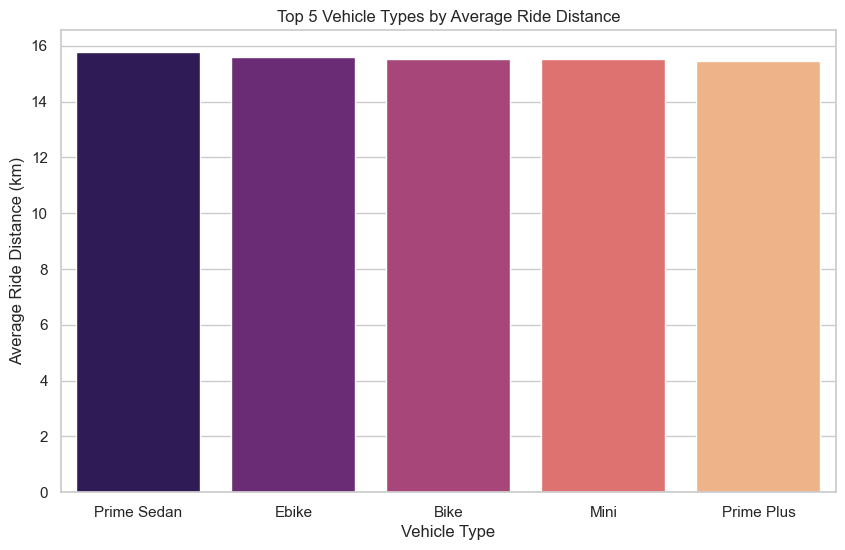

In [26]:
# Chart 3. Top 5 Vehicle Types by Average Ride Distance

top5_vehicle_distance = data.groupby('Vehicle_Type')['Ride_Distance'].mean().nlargest(5)
plt.figure(figsize=(10,6)) 
sns.barplot(x=top5_vehicle_distance.index, y=top5_vehicle_distance.values, palette="magma")
plt.title("Top 5 Vehicle Types by Average Ride Distance")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Ride Distance (km)")
plt.show()


##### 1. Why did you pick the specific chart?

Bar chart compares vehicle categories clearly.

##### 2. What is/are the insight(s) found from the chart?

Premium vehicles serve longer trips, autos/bikes short rides.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Helps target pricing per vehicle.

Negative: Long trips dominated by low-margin vehicles hurt profits.

#### Chart - 4 - Scatterplot — Booking Value vs Ride Distance

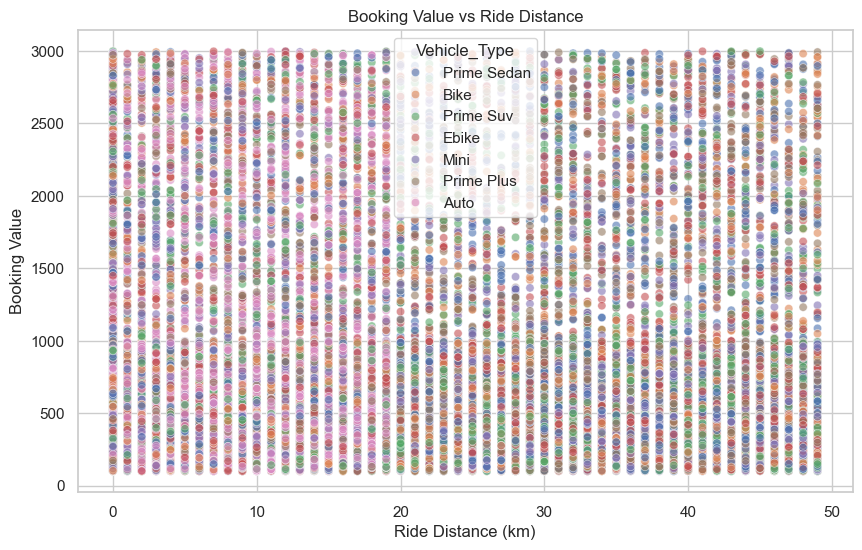

In [27]:
# Chart - 4. Scatterplot — Booking Value vs Ride Distance

plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Ride_Distance', y='Booking_Value', hue='Vehicle_Type', alpha=0.6)
plt.title("Booking Value vs Ride Distance")
plt.xlabel("Ride Distance (km)")
plt.ylabel("Booking Value")
plt.show()


##### 1. Why did you pick the specific chart?

Scatterplots show numeric relationships.

##### 2. What is/are the insight(s) found from the chart?

Positive correlation expected. outliers may cause mispricing/fraud.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Validates pricing logic.

Negative: Outliers erode trust & cause complaints.

#### Chart - 5 - Revenue by Payment Method

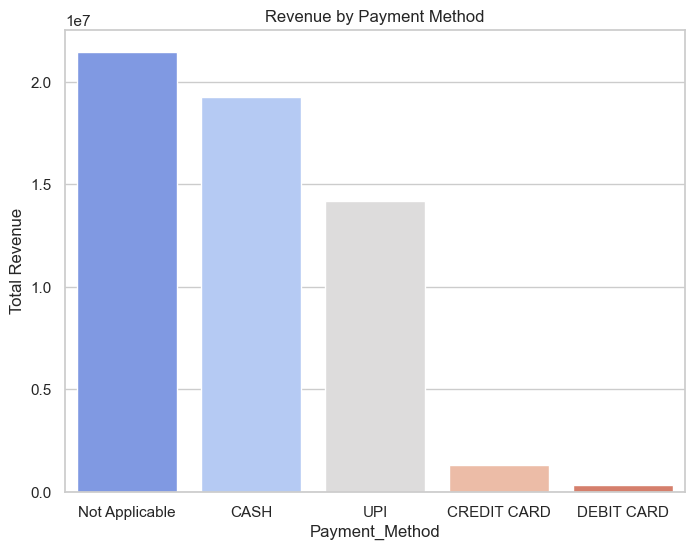

In [28]:
# Chart - 5. Revenue by Payment Method

payment_revenue = data.groupby('Payment_Method')['Booking_Value'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=payment_revenue.index, y=payment_revenue.values, palette="coolwarm")
plt.title("Revenue by Payment Method")
plt.ylabel("Total Revenue")
plt.show()


##### 1. Why did you pick the specific chart?

Bar chart shows revenue contribution easily.

##### 2. What is/are the insight(s) found from the chart?

UPI/Cash dominate - high adoption. Not Applicable denots the incompletion or cancellation of the ride.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Encourage digital will lower cash-handling costs.

Over-dependence on one payment channel is risk.

#### Chart - 6 - Driver Ratings Distribution

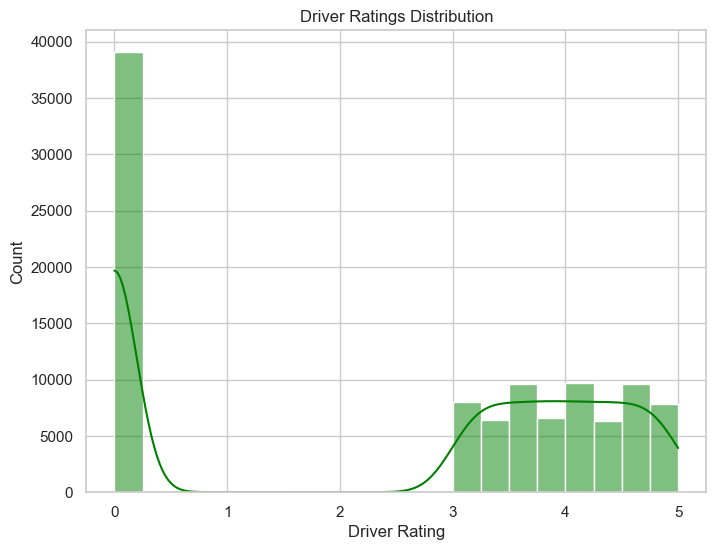

In [29]:
# Chart - 6. Driver Ratings Distribution

plt.figure(figsize=(8,6))
sns.histplot(data['Driver_Ratings'], bins=20, kde=True, color="green")
plt.title("Driver Ratings Distribution")
plt.xlabel("Driver Rating")
plt.show()


##### 1. Why did you pick the specific chart?

Histogram shows spread & service quality.

##### 2. What is/are the insight(s) found from the chart?

Most ratings high; small fraction low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Strong avg ratings boost customer trust.

Negative: Low rated drivers may cause churn risk.

#### Chart - 7 - Customer Ratings Distribution

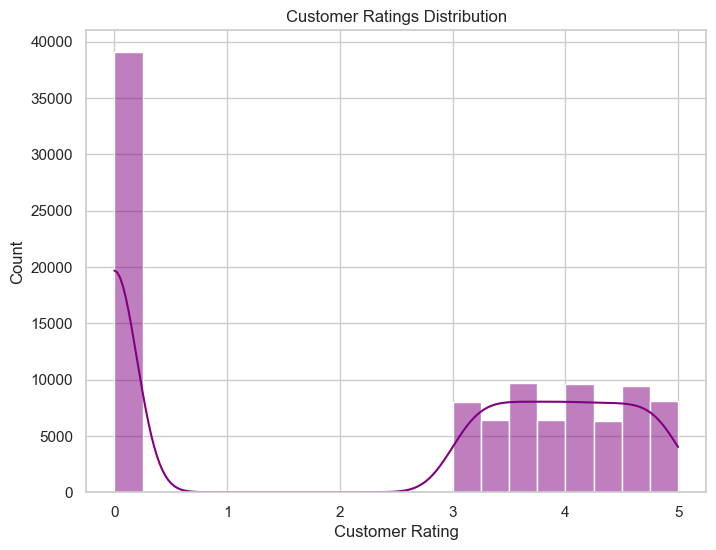

In [30]:
# Chart - 7. Customer Ratings Distribution

plt.figure(figsize=(8,6))
sns.histplot(data['Customer_Rating'], bins=20, kde=True, color="purple")
plt.title("Customer Ratings Distribution")
plt.xlabel("Customer Rating")
plt.show()


##### 1. Why did you pick the specific chart?

Similar to drivers histogram shows how customers are perceived.

##### 2. What is/are the insight(s) found from the chart?

Most customers rated fairly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Identifies loyal/good customers.

Negative: Difficult customers lower driver morale.

#### Chart - 8 - Heatmap — Correlation Matrix

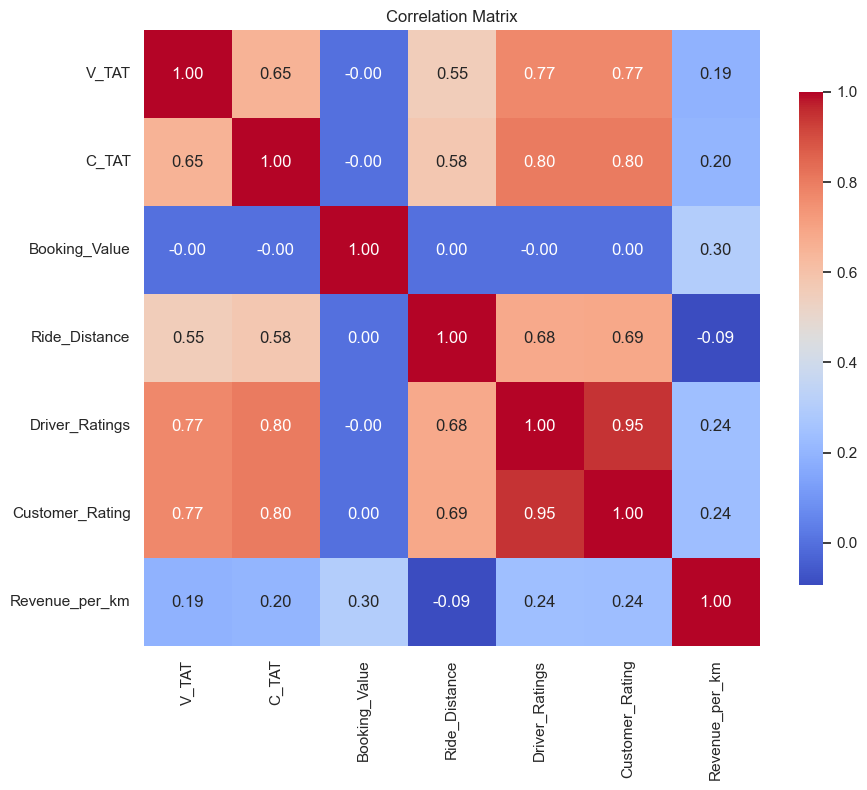

In [31]:
# Chart - 8. Heatmap — Correlation Matrix

plt.figure(figsize=(10,8))
corr = data[['V_TAT', 'C_TAT', 'Booking_Value', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating', 'Revenue_per_km']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.show()


##### 1. Why did you pick the specific chart?

Heatmaps summarize multiple relationships at once.

##### 2. What is/are the insight(s) found from the chart?

Strong correlation (distance ↔ revenue); weak correlation revenue ↔ distance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Validates pricing model.

Negative: Weak/missing correlation between fare & distance = risk of unfair pricing.

#### Chart - 9 - Pair Plot (Scatter Matrix)

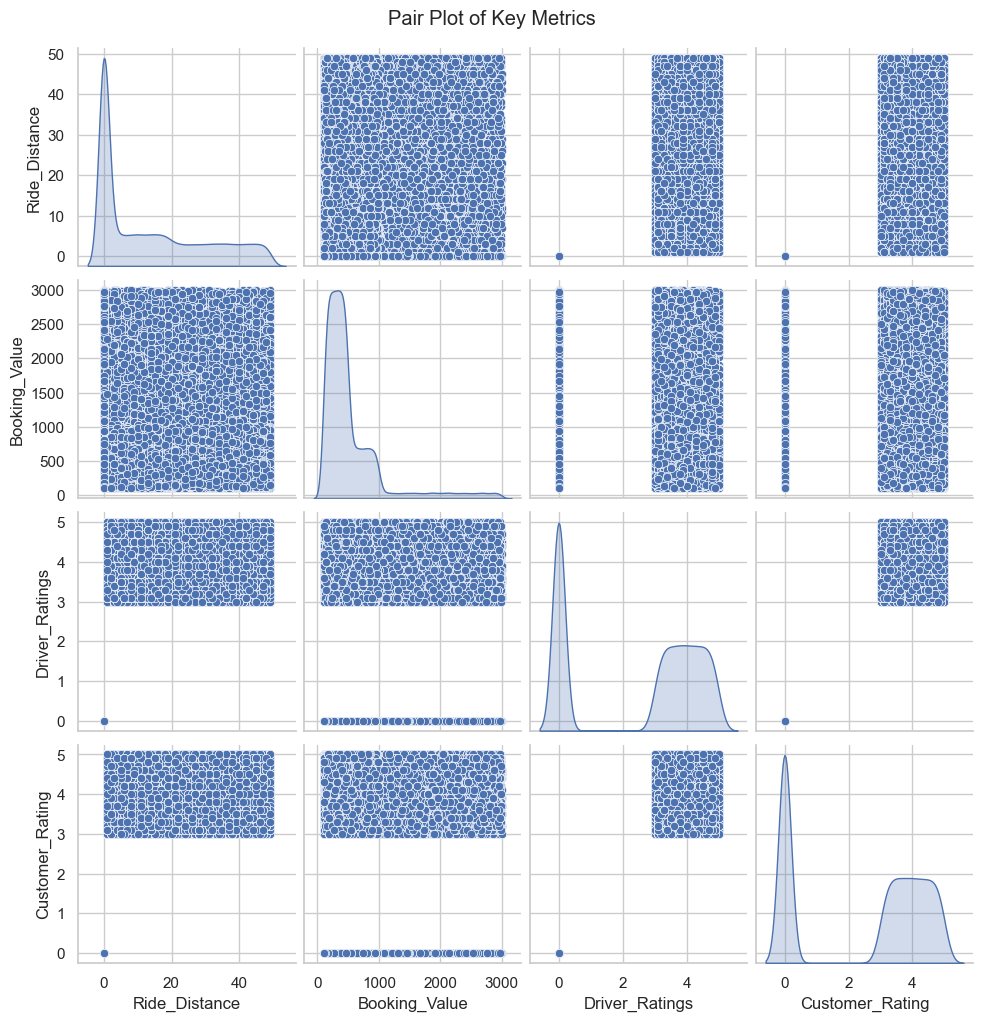

In [32]:
# Chart - 9. Pair Plot (Scatter Matrix)

sns.pairplot(data[['Ride_Distance','Booking_Value','Driver_Ratings','Customer_Rating']], diag_kind='kde')
plt.suptitle("Pair Plot of Key Metrics", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Shows multi-variable relationships & clusters.

##### 2. What is/are the insight(s) found from the chart?

Correlation confirmed; anomalies spotted.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Useful for predictive modeling.

Negative: Outlier clusters indicate fraud/ops issues.

#### Chart - 10 - Cancellation & Incomplete Ride Reasons

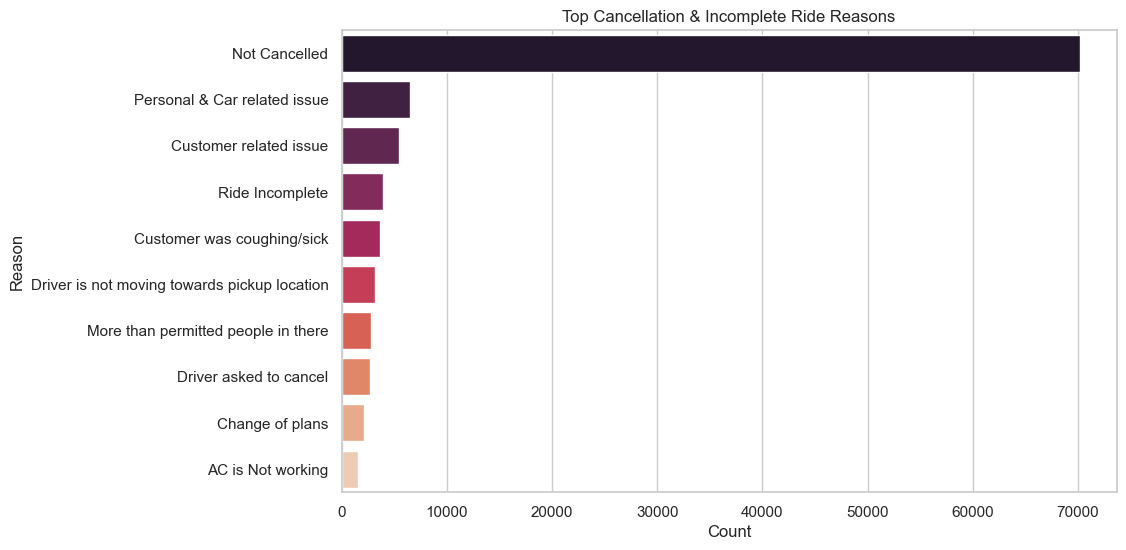

In [33]:
# Chart - 10. Cancellation & Incomplete Ride Reasons

# Count top 10 reasons
cancel_reasons = data['Cancellation_Reason'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=cancel_reasons.values, y=cancel_reasons.index, palette="rocket")
plt.title("Top Cancellation & Incomplete Ride Reasons")
plt.xlabel("Count")
plt.ylabel("Reason")
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart clearly compares long-text reasons and shows the top causes of ride failures.

##### 2. What is/are the insight(s) found from the chart?

Top issues: Personal/car issues, customer issues, and incomplete rides.

Highlights both driver and customer-related cancellations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* Improve driver onboarding

* Set better customer policies

* Fix ride completion issues

Negative:

* Poor experience

* Higher cancellation rates

* Negative brand perception

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

#### Solutions to Business Objectives
1. Enhancing Operational Efficiency
	* Insight: Ride volume over time, heatmaps, and cancellation reasons show when/why supply-demand mismatches occur.
    * Solution:
	    * Use predictive demand modeling to forecast peak hours/days.
	    * Implement driver reallocation strategies and incentive systems for high-demand zones.
	    * Monitor cancellation trends to reduce failed rides by improving communication and wait-time policies.

2. Improving Customer Satisfaction
	* Insight: Ratings distributions (driver & customer) + cancellation analysis highlight service quality gaps.
	* Solution:
	    * Introduce driver training & reward systems for high-rated drivers.
	    * Identify low-rated drivers → retraining or offboarding.
	    * Enhance customer support workflows (e.g., rebooking discounts after cancellations).

3. Optimizing Pricing Strategies
	* Insight: Scatterplots (ride distance vs. fare) and heatmaps show correlation between distance and booking value.
	* Solution:
	    * Ensure dynamic pricing aligns with distance & demand.
	    * Detect and correct outliers/mispriced rides.
	    * Test surge pricing effectiveness → balance profitability without alienating customers.

4. Detecting Anomalies & Fraud
	* Insight: Pair plots & heatmaps help detect unusual booking-value-to-distance ratios.
	* Solution:
	    * Implement anomaly detection models for fraud detection (fake bookings, fare manipulation).
	    * Flag repeated suspicious behavior from drivers/customers.
	    * Integrate fraud alerts into the BI dashboard for real-time monitoring.

#### Client Recommendations (Actionable Steps)
1.	Build a Demand Forecasting Model - Align driver availability with predicted demand.
2.	Introduce Loyalty & Personalization - Use customer rating/behavior data to design targeted promotions.
3.	Optimize Surge Pricing Rules - Ensure fairness while improving revenue.
4.	Cancellation Reduction Program - Improve pickup accuracy, reduce wait times, and incentivize drivers.
5.	Operational Monitoring in Power BI - Track KPIs: cancellation %, average rating, ride volume, revenue by channel.
6.	Streamlit App for Managers - Real-time filters (vehicle type, payment, time period) for quick decision-making.


# **Conclusion**

Write the conclusion here.

This project demonstrates how data-driven insights can transform OLA’s business performance. Through EDA, SQL queries, Power BI dashboards, and an interactive Streamlit app, the analysis reveals patterns in demand, customer satisfaction, pricing, and cancellations.
By implementing the recommended solutions — predictive allocation, pricing optimization, fraud detection, and improved customer-driver experience — OLA can:
* Reduce cancellations and lost revenue,
* Enhance customer trust and retention,
* Optimize driver utilization,
* And ultimately increase profitability and market competitiveness.

In short: Data-informed decisions will make OLA’s operations smarter, customers happier, and business stronger. 
